## Carga de paquetes

In [1]:
import pandas as pd

### Carga de archivo

In [2]:
df = pd.read_csv("Simulador_Redes_SN04_Tribu_Llena_tu_Refri_FINAL_V2.csv", dtype=str )

In [3]:
df.head()

,Tribu,Líder Tribu,Squad,Líder Squad,Departamento,Comprador,Depto,Cat,Categoría,Decil x Formato,...,%MB,Cuenta %MB,FP % Mgn In,Ventas TW,Fact Pond TW,Qty Prom L4W,Inventario (OH+WH+IT),Impuestos,Días para RB,Unnamed: 203
0,Llena Tu Refri Y Más,Juan Carlos Aja,Botanas Dulces Y Checkout,Roberto Ruiz,"82, Impulso",Montserrat Galindo,82,10,DULCES,7,...,0,1,12541.66073,"11,438",-735.3867772,"32,931","314,823",1.08,NaN,NaN
1,Llena Tu Refri Y Más,Juan Carlos Aja,Botanas Dulces Y Checkout,Roberto Ruiz,"82, Impulso",Montserrat Galindo,82,10,DULCES,8,...,0,1,7992.916707,"7,606",-174.7276809,"18,058","386,861",1.08,122,NaN
2,Llena Tu Refri Y Más,Juan Carlos Aja,Botanas Dulces Y Checkout,Roberto Ruiz,"82, Impulso",Montserrat Galindo,82,10,DULCES,7,...,0,1,10721.53691,"9,829",-544.7557196,"23,565","394,285",1.08,137,NaN
3,Llena Tu Refri Y Más,Juan Carlos Aja,Botanas Dulces Y Checkout,Roberto Ruiz,"82, Impulso",Montserrat Galindo,82,10,DULCES,8,...,0,1,6289.041647,"6,146",-51.92818083,"14,224","271,034",1.08,122,NaN
4,Llena Tu Refri Y Más,Juan Carlos Aja,Botanas Dulces Y Checkout,Roberto Ruiz,"82, Impulso",Montserrat Galindo,82,10,DULCES,8,...,0,1,9270.485594,"7,824",-331.4500031,"20,376","316,980",1.08,137,NaN


### Procesamiento de información

In [4]:
df.isnull().any() ## Obtener nulos x columna

Tribu                     False
Líder Tribu               False
Squad                     False
Líder Squad               False
Departamento              False
                          ...  
 Qty Prom L4W             False
 Inventario (OH+WH+IT)     True
Impuestos                 False
Días para RB               True
Unnamed: 203               True
Length: 204, dtype: bool

In [5]:

###########Selección de última semana de precio walmart en archivo ########################
df_precio_wm = df[['Categoría','UPC','Descripción','Precio WM ','Último %Dif Reportado']]
###########Selección de última semana de precio walmart en archivo ########################

df_precio_wm

,Categoría,UPC,Descripción,Precio WM,Último %Dif Reportado
0,DULCES,0789100024836,NESTLE KIT-KAT 4FING,$14.94,-6.4%
1,DULCES,0750617451226,SNICKERS CHOCOLATE C,$23.50,-2.3%
2,DULCES,0750617450264,SNICKERS 21.5 GR,$8.53,-5.5%
3,DULCES,0750617451222,MILKYWAY CHOCO 2PACK,$23.00,-0.8%
4,DULCES,0750617450265,MILKY WAY 22 GR,$8.61,-4.2%
...,...,...,...,...,...
3799,OTROS EMBUTIDOS,0750151849135,PARMA JAMON SERRANO,$85.06,1.8%
3800,OTROS EMBUTIDOS,0750151849129,PARMA SELEC GOURMET,$121.94,-6.3%
3801,OTROS EMBUTIDOS,0750151849165,PARMA DELICHAROLA,$112.79,0.8%
3802,ALIMENTOS VEGETARIANOS,0750302809003,FRIJOL PINTO MOLID0,$38.00,-4.9%


In [6]:
#df_costo_wm_unpivoted = df_precio_wm.melt(id_vars=['Categoría','UPC','Descripción'], var_name='Semana', value_name='Precio')
df_costo_wm_unpivoted = df_precio_wm
df_costo_wm_unpivoted 

,Categoría,UPC,Descripción,Precio WM,Último %Dif Reportado
0,DULCES,0789100024836,NESTLE KIT-KAT 4FING,$14.94,-6.4%
1,DULCES,0750617451226,SNICKERS CHOCOLATE C,$23.50,-2.3%
2,DULCES,0750617450264,SNICKERS 21.5 GR,$8.53,-5.5%
3,DULCES,0750617451222,MILKYWAY CHOCO 2PACK,$23.00,-0.8%
4,DULCES,0750617450265,MILKY WAY 22 GR,$8.61,-4.2%
...,...,...,...,...,...
3799,OTROS EMBUTIDOS,0750151849135,PARMA JAMON SERRANO,$85.06,1.8%
3800,OTROS EMBUTIDOS,0750151849129,PARMA SELEC GOURMET,$121.94,-6.3%
3801,OTROS EMBUTIDOS,0750151849165,PARMA DELICHAROLA,$112.79,0.8%
3802,ALIMENTOS VEGETARIANOS,0750302809003,FRIJOL PINTO MOLID0,$38.00,-4.9%


In [7]:
###prueba para eliminar simbolo de monto

### Eliminación de signo monetario en caso de unpivot
###df_costo_wm_unpivoted['Precio'].str.replace('$', '')

###Eliminación de signo monetario en caso de pase directo
df_costo_wm_unpivoted['Precio WM '].str.replace('$', '')
df_costo_wm_unpivoted['Último %Dif Reportado'].str.replace('%', '')


pd.to_numeric(df_costo_wm_unpivoted['Último %Dif Reportado'].str.replace("%",""), errors='coerce')/100
###df_costo_wm_unpivoted.Precio.iloc[1].replace("$","")
#df_costo_wm_unpivoted.head()

0      -0.064
1      -0.023
2      -0.055
3      -0.008
4      -0.042
        ...  
3799    0.018
3800   -0.063
3801    0.008
3802   -0.049
3803   -0.067
Name: Último %Dif Reportado, Length: 3804, dtype: float64

#### Limpieza de datos

In [8]:
#df_costo_wm_unpivoted['imp_Precio'] = 
### Eliminación de signo monetario en caso de unpivot
###df_costo_wm_unpivoted['imp_Precio'] = pd.to_numeric(df_costo_wm_unpivoted['Precio'].str.replace("$",""), errors='coerce')

###Eliminación de signo monetario en caso de pase directo
df_costo_wm_unpivoted['imp_Precio'] = pd.to_numeric(df_costo_wm_unpivoted['Precio WM '].str.replace("$",""), errors='coerce')

# Eliminación de simbolo de porcentaje y división entre 100
df_costo_wm_unpivoted['pct_ult_dif'] = pd.to_numeric(df_costo_wm_unpivoted['Último %Dif Reportado'].str.replace("%",""), errors='coerce')/100
df_costo_wm_unpivoted  

D:\Program\DS\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Program\DS\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Categoría,UPC,Descripción,Precio WM,Último %Dif Reportado,imp_Precio,pct_ult_dif
0,DULCES,0789100024836,NESTLE KIT-KAT 4FING,$14.94,-6.4%,14.94,-0.064
1,DULCES,0750617451226,SNICKERS CHOCOLATE C,$23.50,-2.3%,23.50,-0.023
2,DULCES,0750617450264,SNICKERS 21.5 GR,$8.53,-5.5%,8.53,-0.055
3,DULCES,0750617451222,MILKYWAY CHOCO 2PACK,$23.00,-0.8%,23.00,-0.008
4,DULCES,0750617450265,MILKY WAY 22 GR,$8.61,-4.2%,8.61,-0.042
...,...,...,...,...,...,...,...
3799,OTROS EMBUTIDOS,0750151849135,PARMA JAMON SERRANO,$85.06,1.8%,85.06,0.018
3800,OTROS EMBUTIDOS,0750151849129,PARMA SELEC GOURMET,$121.94,-6.3%,121.94,-0.063
3801,OTROS EMBUTIDOS,0750151849165,PARMA DELICHAROLA,$112.79,0.8%,112.79,0.008
3802,ALIMENTOS VEGETARIANOS,0750302809003,FRIJOL PINTO MOLID0,$38.00,-4.9%,38.00,-0.049


In [9]:
### separación de columnas fecha y origen
#if df_costo_wm_unpivoted['Semana'].iloc[0] == 'Precio WM 201901' :
    #print(1)
#else:
 #   print(0)

    
#### Caso unpivot    
######place_str = df_costo_wm_unpivoted['Semana'].iloc[0].find(' ',7)
######df_costo_wm_unpivoted['Semana'].iloc[0][place_str:]
#### Caso unpivot

#df_costo_wm_unpivoted['Semana'].iloc[0].count(' ')

In [10]:
df_costo_wm_unpivoted.describe()

,imp_Precio,pct_ult_dif
count,3804.000000,3804.000000
mean,38.001493,0.025364
std,37.281083,0.087784
min,1.860000,-0.649000
25%,12.990000,-0.018000
50%,24.915000,0.019000
75%,53.955000,0.066250
max,477.000000,0.882000


In [11]:
print ("Renglones     : " ,df_costo_wm_unpivoted.shape[0])
print ("Columnas  : " ,df_costo_wm_unpivoted.shape[1])
print ("\nCaracterísticas : \n" ,df_costo_wm_unpivoted.columns.tolist())
print ("\nValores faltantes :  ", df_costo_wm_unpivoted.isnull().sum().values.sum())

Renglones     :  3804
Columnas  :  7

Características : 
 ['Categoría', 'UPC', 'Descripción', 'Precio WM ', 'Último %Dif Reportado', 'imp_Precio', 'pct_ult_dif']

Valores faltantes :   0


### Exploración de información

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


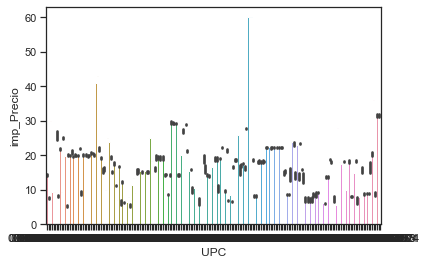

In [13]:
#g = sns.pairplot(df_costo_wm_unpivoted)
sns.barplot(x="UPC", y="imp_Precio", data=df_costo_wm_unpivoted[df_costo_wm_unpivoted['Categoría']=='DULCES'])



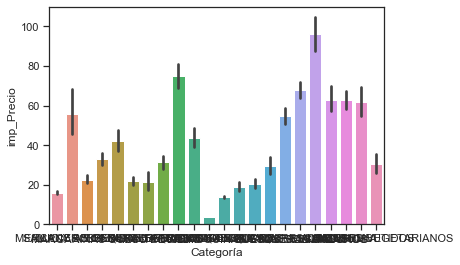

In [14]:
sns.barplot(x="Categoría", y="imp_Precio",data=df_costo_wm_unpivoted)

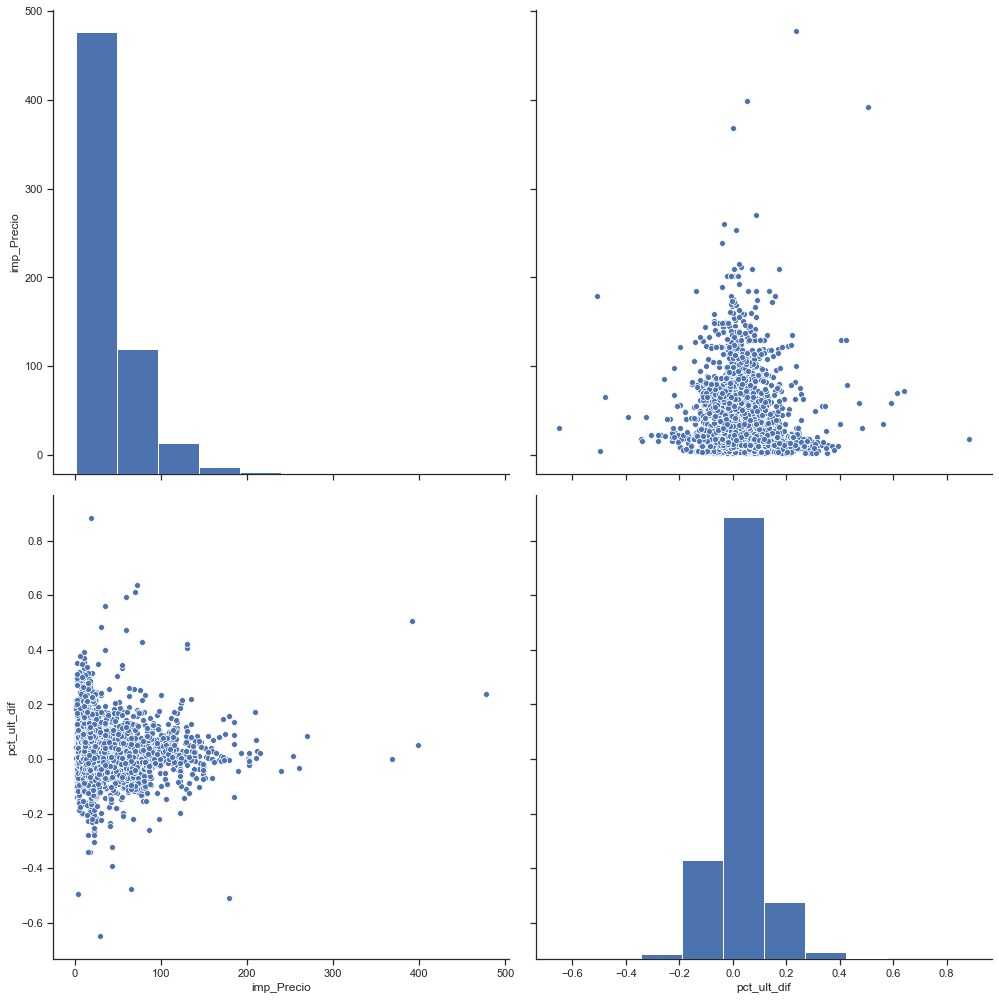

In [15]:

#g = sns.pairplot(df_costo_wm_unpivoted, height=7, vars=["Categoría", "Semana"])
g = sns.pairplot(df_costo_wm_unpivoted, height=7, vars=["imp_Precio", "pct_ult_dif"])
 
#sns.scatterplot(x="imp_Precio", y="UPC",hue="Categoría", data=df_costo_wm_unpivoted)

###sns.scatterplot(x="imp_Precio", y="UPC",hue="Categoría", data=df_costo_wm_unpivoted)
#sns.scatterplot(x="imp_Precio", y="UPC",hue="Semana", data=df_costo_wm_unpivoted[df_costo_wm_unpivoted['UPC']=='0750151849165'])
#df_costo_wm_unpivoted[df_costo_wm_unpivoted['UPC']=='0750151849165']
#sns.barplot(x="Semana", y="imp_Precio", data=df_costo_wm_unpivoted[df_costo_wm_unpivoted['UPC']=='0750151849165'])
#sns.pairplot(df_costo_wm_unpivoted[df_costo_wm_unpivoted['Categoría']=='DULCES'])
#, height=3, vars=['Categoría', 'Semana'])

In [16]:
df_costo_wm_unpivoted[df_costo_wm_unpivoted['Categoría']=='DULCES']['UPC'].count()
df_costo_wm_unpivoted[df_costo_wm_unpivoted['Categoría']=='DULCES'].groupby('Categoría').count()
df_costo_wm_unpivoted[['Categoría','UPC']].groupby('Categoría').count() ## regresa conteo count(*)
df_costo_wm_unpivoted[['Categoría','UPC','imp_Precio']].groupby('Categoría').agg(
num_UPCxCat = pd.NamedAgg(column='UPC', aggfunc=max),
imp_PrecioXCat = pd.NamedAgg(column='imp_Precio', aggfunc=sum)

)


#df_costo_wm_unpivoted.count()

,num_UPCxCat,imp_PrecioXCat
Categoría,,
AGUAS QUINAS Y MINERALIZADAS,0841164001004,4772.93
AGUAS SABORIZADAS,0750619250681,4573.90
ALIMENTOS VEGETARIANOS,0750302809003,275.71
BEBIDAS REFRIGERADAS,0750644310093,3890.31
COOLERS Y REFRESCANTES,0750302441665,2658.79
CREMAS,0750301942182,4443.73
DULCES,0841003194874,8205.34
HELADOS,0750639020081,16725.04
ISOTONICOS,0750302036209,2445.89


In [17]:
df_costo_wm_unpivoted[df_costo_wm_unpivoted['Categoría']=='DULCES']
#df_costo_wm_unpivoted_sub = 

,Categoría,UPC,Descripción,Precio WM,Último %Dif Reportado,imp_Precio,pct_ult_dif
0,DULCES,0789100024836,NESTLE KIT-KAT 4FING,$14.94,-6.4%,14.94,-0.064
1,DULCES,0750617451226,SNICKERS CHOCOLATE C,$23.50,-2.3%,23.50,-0.023
2,DULCES,0750617450264,SNICKERS 21.5 GR,$8.53,-5.5%,8.53,-0.055
3,DULCES,0750617451222,MILKYWAY CHOCO 2PACK,$23.00,-0.8%,23.00,-0.008
4,DULCES,0750617450265,MILKY WAY 22 GR,$8.61,-4.2%,8.61,-0.042
...,...,...,...,...,...,...,...
2531,DULCES,0750616120995,GREZON HUEVO PEPPA,$22.50,-30.5%,22.50,-0.305
2532,DULCES,0750616121743,GREZON HUEVO JACKIE,$22.50,-27.8%,22.50,-0.278
2533,DULCES,0762230098658,HALLS MINI EXTRA STR,$8.99,-0.1%,8.99,-0.001
2534,DULCES,0762230098650,HALLS MINI MENTA,$8.73,-3.1%,8.73,-0.031


#### Gráficas generales precio walmart

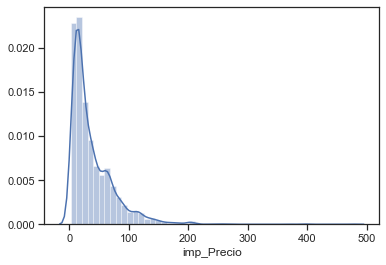

In [18]:
sns.distplot(df_costo_wm_unpivoted['imp_Precio'])

In [19]:
#df_costo_wm_unpivoted[df_costo_wm_unpivoted['Semana'] == 'Precio WM ']  # 3,804 registros

df_costo_wm_unpivoted

,Categoría,UPC,Descripción,Precio WM,Último %Dif Reportado,imp_Precio,pct_ult_dif
0,DULCES,0789100024836,NESTLE KIT-KAT 4FING,$14.94,-6.4%,14.94,-0.064
1,DULCES,0750617451226,SNICKERS CHOCOLATE C,$23.50,-2.3%,23.50,-0.023
2,DULCES,0750617450264,SNICKERS 21.5 GR,$8.53,-5.5%,8.53,-0.055
3,DULCES,0750617451222,MILKYWAY CHOCO 2PACK,$23.00,-0.8%,23.00,-0.008
4,DULCES,0750617450265,MILKY WAY 22 GR,$8.61,-4.2%,8.61,-0.042
...,...,...,...,...,...,...,...
3799,OTROS EMBUTIDOS,0750151849135,PARMA JAMON SERRANO,$85.06,1.8%,85.06,0.018
3800,OTROS EMBUTIDOS,0750151849129,PARMA SELEC GOURMET,$121.94,-6.3%,121.94,-0.063
3801,OTROS EMBUTIDOS,0750151849165,PARMA DELICHAROLA,$112.79,0.8%,112.79,0.008
3802,ALIMENTOS VEGETARIANOS,0750302809003,FRIJOL PINTO MOLID0,$38.00,-4.9%,38.00,-0.049


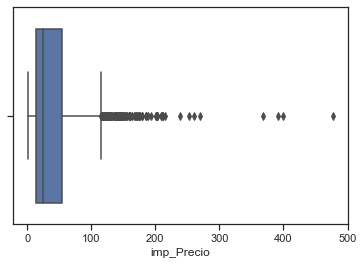

In [20]:
sns.boxplot(x=df_costo_wm_unpivoted['imp_Precio'])

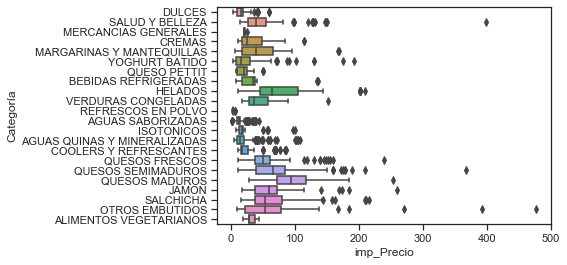

In [21]:
sns.boxplot(x=df_costo_wm_unpivoted['imp_Precio'], y="Categoría", data=df)

#### Gráficas generales último diferencial

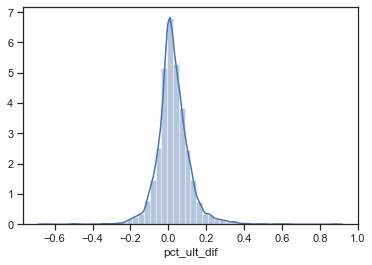

In [22]:
sns.distplot(df_costo_wm_unpivoted['pct_ult_dif'])

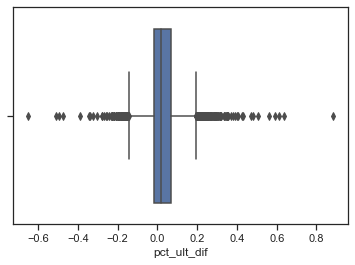

In [23]:
sns.boxplot(x=df_costo_wm_unpivoted['pct_ult_dif'])

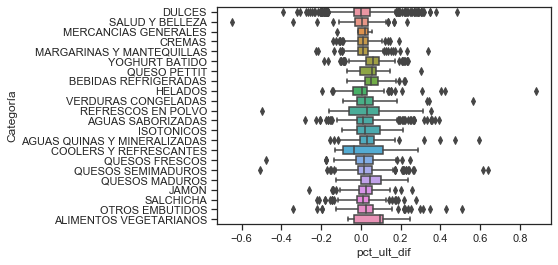

In [24]:
sns.boxplot(x=df_costo_wm_unpivoted['pct_ult_dif'], y="Categoría", data=df)

#### Gráficas particulares categoría dulces walmart

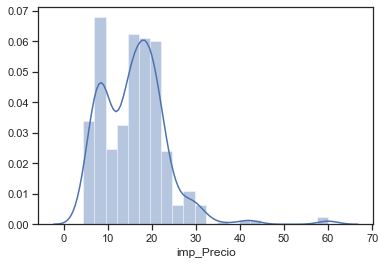

In [25]:
sns.distplot(df_costo_wm_unpivoted[df_costo_wm_unpivoted['Categoría']=='DULCES']['imp_Precio'])

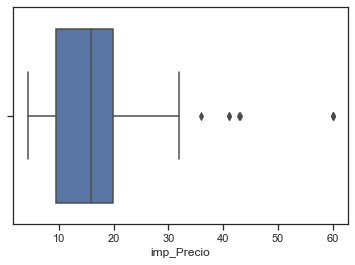

In [26]:
sns.boxplot(df_costo_wm_unpivoted[df_costo_wm_unpivoted['Categoría']=='DULCES']['imp_Precio'])

In [27]:
df['Último %Dif Reportado']

0       -6.4%
1       -2.3%
2       -5.5%
3       -0.8%
4       -4.2%
        ...  
3799     1.8%
3800    -6.3%
3801     0.8%
3802    -4.9%
3803    -6.7%
Name: Último %Dif Reportado, Length: 3804, dtype: object

In [28]:
#sns.pairplot(df_costo_wm_unpivoted)

## Modelado

In [29]:
df_costo_wm_unpivoted_p = df_costo_wm_unpivoted[df_costo_wm_unpivoted['Categoría']=='DULCES'].reset_index().copy()
#df_costo_wm_unpivoted_p.reset_index()
df_costo_wm_unpivoted_p = df_costo_wm_unpivoted_p.drop(columns=['index'])
df_costo_wm_unpivoted_p

,Categoría,UPC,Descripción,Precio WM,Último %Dif Reportado,imp_Precio,pct_ult_dif
0,DULCES,0789100024836,NESTLE KIT-KAT 4FING,$14.94,-6.4%,14.94,-0.064
1,DULCES,0750617451226,SNICKERS CHOCOLATE C,$23.50,-2.3%,23.50,-0.023
2,DULCES,0750617450264,SNICKERS 21.5 GR,$8.53,-5.5%,8.53,-0.055
3,DULCES,0750617451222,MILKYWAY CHOCO 2PACK,$23.00,-0.8%,23.00,-0.008
4,DULCES,0750617450265,MILKY WAY 22 GR,$8.61,-4.2%,8.61,-0.042
...,...,...,...,...,...,...,...
508,DULCES,0750616120995,GREZON HUEVO PEPPA,$22.50,-30.5%,22.50,-0.305
509,DULCES,0750616121743,GREZON HUEVO JACKIE,$22.50,-27.8%,22.50,-0.278
510,DULCES,0762230098658,HALLS MINI EXTRA STR,$8.99,-0.1%,8.99,-0.001
511,DULCES,0762230098650,HALLS MINI MENTA,$8.73,-3.1%,8.73,-0.031


In [30]:
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

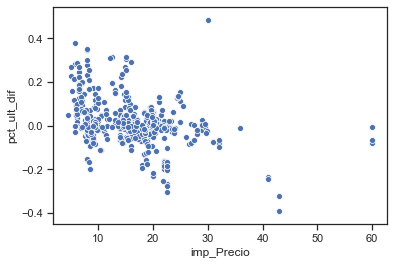

In [31]:
sns.scatterplot(x='imp_Precio', y='pct_ult_dif', 

                     data=df_costo_wm_unpivoted_p)
 #result = sp.stats.pearsonr('imp_Precio','Último %Dif Reportado')[df_costo_wm_unpivoted]
 

### 1.- AgglomerativeClustering

In [32]:

## 3
from sklearn.cluster import AgglomerativeClustering 





D:\Program\DS\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


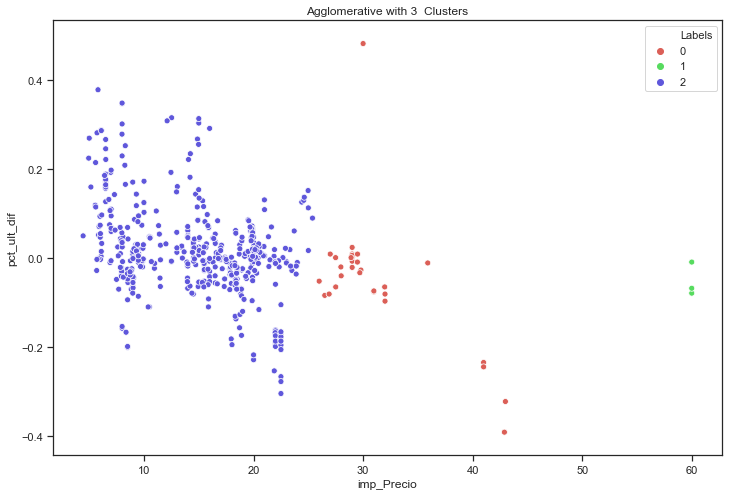

In [33]:
## 3.1
X = df_costo_wm_unpivoted_p[['imp_Precio','pct_ult_dif']]
num_clusters = 3
agglom = AgglomerativeClustering(n_clusters=num_clusters, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='imp_Precio', y='pct_ult_dif', hue=X['Labels'], 
                palette=sns.color_palette('hls', 3),data=df_costo_wm_unpivoted_p)
plt.title('Agglomerative with %d  Clusters' %num_clusters)
plt.show()

#sns.scatterplot(x='imp_Precio', y='pct_ult_dif', hue = y,  data=df_costo_wm_unpivoted)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)


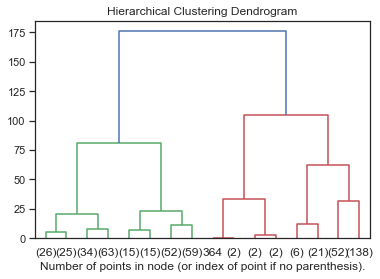

In [34]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    #iris = load_iris()
X = df_costo_wm_unpivoted_p[['imp_Precio','pct_ult_dif']]

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
print(model)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### 2.- Método MeanShift

In [35]:
##4
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [36]:
##4
X = df_costo_wm_unpivoted_p[['imp_Precio','pct_ult_dif']]

In [37]:
##4
T_WM = df_costo_wm_unpivoted_p[['imp_Precio','pct_ult_dif']].to_numpy()


In [38]:

##4
X = T_WM

bandwidth = estimate_bandwidth(X, quantile=0.9, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


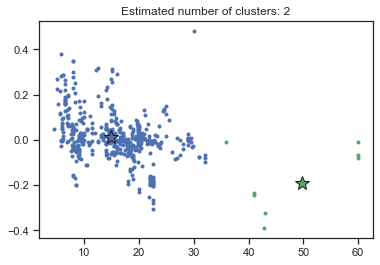

In [39]:
##4
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bg')


for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]

    #plt.plot(X['imp_Precio'], X['pct_ult_dif'], col + '.')
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    
    #print(labels)
    #plt.plot(cluster_center[0], cluster_center[1], '*', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
    
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    #plt.plot(X['imp_Precio'], X['pct_ult_dif'], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], '*', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [40]:
# Medida de error
#dir(ms)
ms.bandwidth

13.597613378804484

### Análisis para determinar k

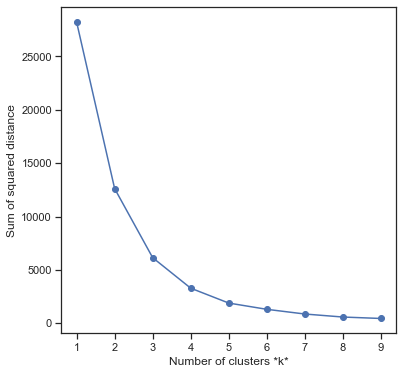

In [41]:
# Run the Kmeans algorithm and get the index of data points clusters
X = df_costo_wm_unpivoted_p[['imp_Precio','pct_ult_dif']]
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

### Fuente: 
### https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

### 3.- Aplicación de K means

In [42]:
X = df_costo_wm_unpivoted_p[['imp_Precio','pct_ult_dif']]
modelo = KMeans(n_clusters = 3)  #Se define número de clusters
modelo.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
### probar
#kmeans = KMeans(n_clusters=5).fit(X)
centroids = modelo.cluster_centers_
print(centroids)

[[ 1.83547869e+01 -9.34098361e-03]
 [ 3.35126471e+01 -4.82941176e-02]
 [ 8.43505747e+00  5.60114943e-02]]


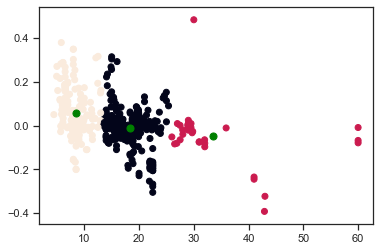

In [44]:
# Obtiene las etiquetas que especifican a qué grupo pertenecen los datos de X
y = modelo.predict(X)

# Obtiene las coordenadas de los centroides
C = modelo.cluster_centers_

# Grafica los datos agrupados
######plt.scatter(df_costo_wm_unpivoted[['imp_Precio']],df_costo_wm_unpivoted[['pct_ult_dif']],c=y)
plt.scatter(X['imp_Precio'],X['pct_ult_dif'],c=y)
#plt.scatter(df_costo_wm_unpivoted[['imp_Precio']],df_costo_wm_unpivoted[['pct_ult_dif']],marker='*',color = 'black', s = 1000)
plt.scatter(C[:,0],C[:,1],marker='.',color = 'green', s = 200)

In [45]:
#vix_on_gdp = pd.ols(y=df['imp_Precio'], x=df['pct_ult_dif'], intercept=True)
#print(df_costo_wm_unpivoted['imp_Precio'].corr(df_costo_wm_unpivoted['pct_ult_dif']), vix_on_gdp.f_stat['p-value'])
#dir(pd)
df_costo_wm_unpivoted_p.corr()

,imp_Precio,pct_ult_dif
imp_Precio,1.000000,-0.386194
pct_ult_dif,-0.386194,1.000000


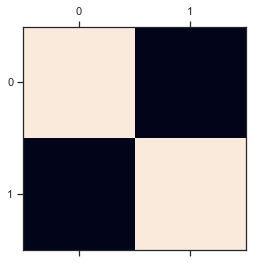

In [46]:
plt.matshow(df_costo_wm_unpivoted_p.corr())

In [47]:
type(y)
y_Serie = pd.Series(y)
print(y_Serie)
print(y_Serie.unique())
df_costo_wm_unpivoted_p['Clasif']=y_Serie
df_costo_wm_unpivoted_p.tail(5)
df_costo_wm_unpivoted_p

0      0
1      0
2      2
3      0
4      2
      ..
508    0
509    0
510    2
511    2
512    1
Length: 513, dtype: int32
[0 2 1]


,Categoría,UPC,Descripción,Precio WM,Último %Dif Reportado,imp_Precio,pct_ult_dif,Clasif
0,DULCES,0789100024836,NESTLE KIT-KAT 4FING,$14.94,-6.4%,14.94,-0.064,0
1,DULCES,0750617451226,SNICKERS CHOCOLATE C,$23.50,-2.3%,23.50,-0.023,0
2,DULCES,0750617450264,SNICKERS 21.5 GR,$8.53,-5.5%,8.53,-0.055,2
3,DULCES,0750617451222,MILKYWAY CHOCO 2PACK,$23.00,-0.8%,23.00,-0.008,0
4,DULCES,0750617450265,MILKY WAY 22 GR,$8.61,-4.2%,8.61,-0.042,2
...,...,...,...,...,...,...,...,...
508,DULCES,0750616120995,GREZON HUEVO PEPPA,$22.50,-30.5%,22.50,-0.305,0
509,DULCES,0750616121743,GREZON HUEVO JACKIE,$22.50,-27.8%,22.50,-0.278,0
510,DULCES,0762230098658,HALLS MINI EXTRA STR,$8.99,-0.1%,8.99,-0.001,2
511,DULCES,0762230098650,HALLS MINI MENTA,$8.73,-3.1%,8.73,-0.031,2


In [48]:
df_costo_wm_unpivoted_p[df_costo_wm_unpivoted_p['Clasif']==0]

,Categoría,UPC,Descripción,Precio WM,Último %Dif Reportado,imp_Precio,pct_ult_dif,Clasif
0,DULCES,0789100024836,NESTLE KIT-KAT 4FING,$14.94,-6.4%,14.94,-0.064,0
1,DULCES,0750617451226,SNICKERS CHOCOLATE C,$23.50,-2.3%,23.50,-0.023,0
3,DULCES,0750617451222,MILKYWAY CHOCO 2PACK,$23.00,-0.8%,23.00,-0.008,0
5,DULCES,0750610560606,TRIDENT VUP CHICLE Y,$17.85,-0.9%,17.85,-0.009,0
9,DULCES,0750610560605,TRIDENT VUP MENTA,$17.82,-2.4%,17.82,-0.024,0
...,...,...,...,...,...,...,...,...
505,DULCES,0762221087954,OREO CHOCOLATE CREMO,$14.98,25.6%,14.98,0.256,0
506,DULCES,0750616121867,GREZON PAW PATROL CH,$22.50,-18.7%,22.50,-0.187,0
507,DULCES,0750616121840,GREZON BLAZE MONSTER,$21.89,-25.4%,21.89,-0.254,0
508,DULCES,0750616120995,GREZON HUEVO PEPPA,$22.50,-30.5%,22.50,-0.305,0


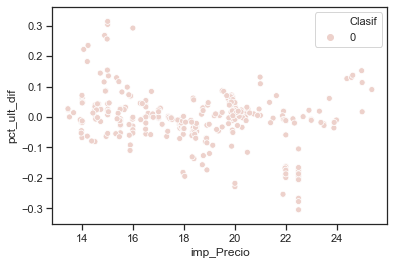

In [49]:
## Gráfica tomada del dataframe
sns.scatterplot(x='imp_Precio', y='pct_ult_dif', hue = 'Clasif',  data=df_costo_wm_unpivoted_p[df_costo_wm_unpivoted_p['Clasif']==0])

In [50]:
df_costo_wm_unpivoted_p['Clasif'].unique()

array([0, 2, 1], dtype=int64)

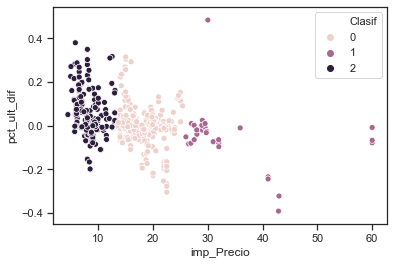

In [51]:
## Gráfica tomada del dataframe
sns.scatterplot(x='imp_Precio', y='pct_ult_dif', hue = 'Clasif',  data=df_costo_wm_unpivoted_p)

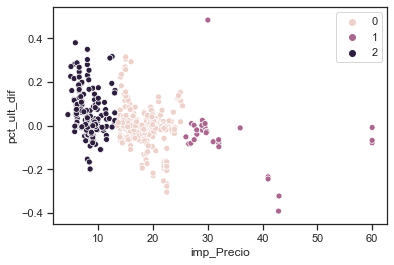

In [52]:
#plt.scatter(df_costo_wm_unpivoted[['imp_Precio']],df_costo_wm_unpivoted[['pct_ult_dif']],c=y)

sns.scatterplot(x='imp_Precio', y='pct_ult_dif', hue = y,  data=df_costo_wm_unpivoted_p)

In [53]:
# Medida de error
modelo.score(X)

-6153.391223911079

In [54]:
df_costo_wm_unpivoted[['imp_Precio','pct_ult_dif']]

,imp_Precio,pct_ult_dif
0,14.94,-0.064
1,23.50,-0.023
2,8.53,-0.055
3,23.00,-0.008
4,8.61,-0.042
...,...,...
3799,85.06,0.018
3800,121.94,-0.063
3801,112.79,0.008
3802,38.00,-0.049


In [55]:
help(modelo.score)

Help on method score in module sklearn.cluster._kmeans:

score(X, y=None, sample_weight=None) method of sklearn.cluster._kmeans.KMeans instance
    Opposite of the value of X on the K-means objective.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        New data.
    
    y : Ignored
        Not used, present here for API consistency by convention.
    
    sample_weight : array-like, shape (n_samples,), optional
        The weights for each observation in X. If None, all observations
        are assigned equal weight (default: None).
    
    Returns
    -------
    score : float
        Opposite of the value of X on the K-means objective.



In [56]:
modelo.inertia_

6153.391223911074

In [57]:
from sklearn import metrics
labels = modelo.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.6495524755181692


### 4.- Modelo SVM

In [58]:
##2
#División de datos en 70% entrenamiento y 30% pruebas.

from sklearn.model_selection import train_test_split

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X,y, test_size=0.3, random_state=0)

In [59]:
#Estandarización de datos -- Se recomienda estandarizar el subconjunto de datos de entrenamiento
#y a partir de los parámetros (media y desviación estándar), utilizarlos para estandarizar el subconjunto de datos de prueba. 

from sklearn.preprocessing import StandardScaler

estandarizacion = StandardScaler()
estandarizacion.fit(X_entrenamiento)

Z_entrenamiento = pd.DataFrame(estandarizacion.transform(X_entrenamiento))
Z_prueba = pd.DataFrame(estandarizacion.transform(X_prueba))

In [60]:
# Definir el modelo SVM (modelo) y entrenarlo
from sklearn import svm

modelo=svm.SVC(kernel='linear')
modelo.fit(Z_entrenamiento,y_entrenamiento)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
# Obtener las predicciones (y_prediccion) del subconjunto de datos de pruebas
y_prediccion=modelo.predict(Z_prueba)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       101
           1       1.00      1.00      1.00         7
           2       1.00      0.93      0.97        46

    accuracy                           0.98       154
   macro avg       0.99      0.98      0.98       154
weighted avg       0.98      0.98      0.98       154



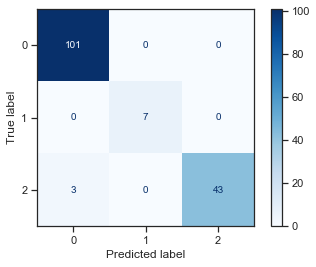

In [62]:
#Evaluar model de SVC


from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(classification_report(y_prueba,y_prediccion))

mc = plot_confusion_matrix(modelo, Z_prueba, y_prueba, cmap=plt.cm.Blues, values_format = '0.0f')

#print(mc.confusion_matrix)
plt.show()